In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
key_metrics_community_1_df = pd.read_csv('results/backtest_results/key_metrics_community_1_TEST.csv')
key_metrics_community_2_df = pd.read_csv('results/backtest_results/key_metrics_community_2_(TEST).csv')

#Concat community 1 and community 2 dataframes

key_metrics_merged_df = pd.concat([key_metrics_community_1_df, key_metrics_community_2_df], axis=0)
key_metrics_merged_df.reset_index(drop=True, inplace=True)




In [115]:
#Sort key_metrics_merged_df by Total Return in descending order
#key_metrics_merged_df.sort_values(by='Total return (%)', ascending=False, inplace=True)

#key_metrics_merged_df.sort_values(by='Max drawdown (%)', inplace=True)

#key_metrics_merged_df.sort_values(by='Average entry beta', ascending=False, inplace=True)

key_metrics_merged_df.sort_values(by = 'Beta series returns MAD (%)')
#Allow full display of the dataframe
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Median Absolute Percent Delta Beta (%),Beta series returns MAD (%),Average S1 trade returns (%),Average S2 trade returns (%),β_bin
14,0,MANAUSDT_2024_5m ~ SANDUSDT_2024_5m,16.863636,0.298486,2.475377,108,74.074074,360.601852,0.896456,8.735688,0.160262,-0.350973,-0.231476,"(0.0, 10.0]"
17,0,AXSUSDT_2024_5m ~ SANDUSDT_2024_5m,38.716948,0.116615,17.362418,129,62.790698,376.627907,16.063325,11.209689,0.213571,-0.554746,-0.595318,"(10.0, 20.0]"
12,0,AXSUSDT_2024_5m ~ MANAUSDT_2024_5m,1.650123,0.005367,28.872530,117,51.282051,360.128205,16.500546,12.777060,0.228001,-0.389949,-0.255736,"(10.0, 20.0]"
71,0,FLOWUSDT_2024_5m ~ SANDUSDT_2024_5m,7.703513,0.043582,13.443118,131,63.358779,409.007634,2.028629,15.280151,0.259318,-0.157743,-0.074199,"(10.0, 20.0]"
82,0,FLOWUSDT_2024_5m ~ MANAUSDT_2024_5m,16.474751,0.094553,11.839234,123,64.227642,402.073171,1.927036,15.444809,0.275141,-0.004367,-0.217613,"(10.0, 20.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,SEIUSDT_2024_5m ~ CRVUSDT_2024_5m,-21.915755,-0.065852,31.394747,107,57.009346,410.373832,0.974852,43.720564,0.676158,0.372112,0.005936,"(40.0, 50.0]"
34,0,INJUSDT_2024_5m ~ LDOUSDT_2024_5m,2.279384,0.006766,21.957747,107,51.401869,429.766355,5.465398,55.166012,0.726643,-0.244682,-0.196042,"(50.0, 60.0]"
35,0,JTOUSDT_2024_5m ~ NEARUSDT_2024_5m,44.056323,0.118132,28.030595,111,63.963964,406.981982,0.328136,49.057422,0.768635,0.291213,0.215316,"(40.0, 50.0]"
91,0,LTCUSDT_2024_5m ~ MKRUSDT_2024_5m,11.392324,0.035337,19.942892,126,68.253968,412.738095,0.009459,53.748052,0.822251,0.312800,0.151625,"(50.0, 60.0]"


In [94]:
key_metrics_merged_df['Median Absolute Percent Delta Beta (%)']

92    16.011991
38    35.504493
87    21.111015
20    20.303976
83    35.933738
        ...    
79    37.859089
76    23.835010
25    31.947623
72    27.263968
53    46.018638
Name: Median Absolute Percent Delta Beta (%), Length: 96, dtype: float64

In [91]:
#Drop columns: Mean Absolute Percent Delta Beta (%) and Beta series returns std (%)
key_metrics_merged_df.drop(columns=['Mean Absolute Percent Delta Beta (%)', 'Beta series returns std (%)'], inplace=True)


In [81]:
key_metrics_merged_df.to_csv('key_metrics_merged_df.csv', index=False)

In [47]:
returns_community_1 = key_metrics_community_1_df['Total return (%)'].values
returns_community_2 = key_metrics_community_2_df['Total return (%)'].values

# Find relationships
---

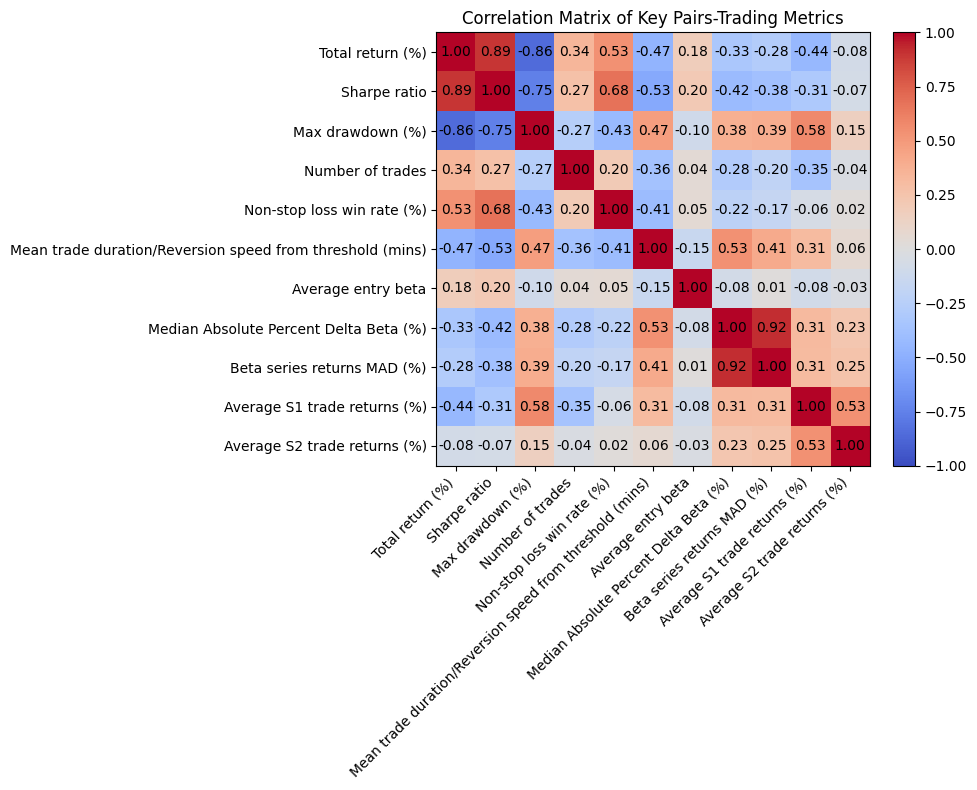

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load your CSV (adjust path as needed)
df = key_metrics_merged_df

# 2. Select only the numeric columns you care about
numeric_cols = [
    'Total return (%)',
    'Sharpe ratio',
    'Max drawdown (%)',
    'Number of trades',
    'Non-stop loss win rate (%)',
    'Mean trade duration/Reversion speed from threshold (mins)',
    'Average entry beta',
    'Median Absolute Percent Delta Beta (%)',
    'Beta series returns MAD (%)',
    'Average S1 trade returns (%)',
    'Average S2 trade returns (%)'
]
data = df[numeric_cols]

# 3. Compute the correlation matrix
corr = data.corr()

# 4. Plot it with matplotlib
plt.figure(figsize=(10, 8))
im = plt.imshow(corr, 
                cmap='coolwarm', 
                vmin=-1, vmax=+1, 
                interpolation='none')
plt.colorbar(im, fraction=0.046, pad=0.04)

# 5. Label axes
ticks = np.arange(len(numeric_cols))
plt.xticks(ticks, numeric_cols, rotation=45, ha='right')
plt.yticks(ticks, numeric_cols)

# 6. Annotate correlation values
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        val = corr.iloc[i, j]
        plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.title("Correlation Matrix of Key Pairs-Trading Metrics")
plt.tight_layout()
plt.show()


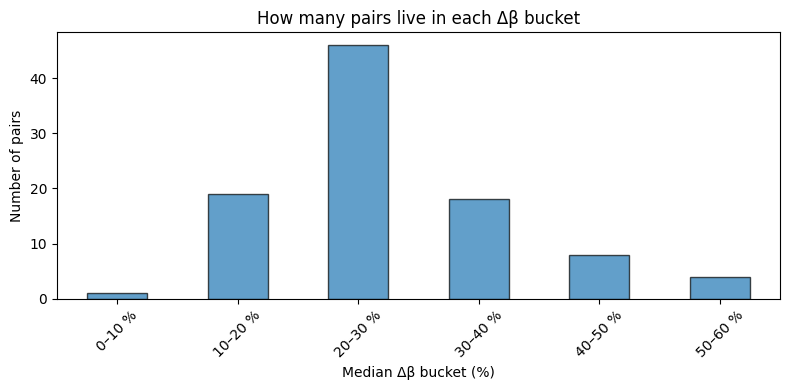

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Define your bins exactly as before:
bin_edges = np.arange(0, 61, 10)  # [0,10,20,30,40,50,60]
bin_labels = [f"{i}–{i+10} %" for i in bin_edges[:-1]]

# 2) Cut your series into those bins
df = key_metrics_merged_df.copy()   # or whatever your DataFrame is called
df["Δβ_bucket"] = pd.cut(
    df["Median Absolute Percent Delta Beta (%)"],
    bins=bin_edges,
    labels=bin_labels,
    right=False,    # so that 0–10 means [0,10)
)

# 3) Count how many pairs in each bucket
counts = df["Δβ_bucket"].value_counts().reindex(bin_labels, fill_value=0)

# 4) Plot
plt.figure(figsize=(8,4))
counts.plot(kind="bar", color="C0", edgecolor="k", alpha=0.7)
plt.xlabel("Median Δβ bucket (%)")
plt.ylabel("Number of pairs")
plt.title("How many pairs live in each Δβ bucket")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/v0/xxx_2wqx4qsc_858pvgmg3_m0000gp/T/ipykernel_55520/3040040885.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('β_bin')[y.name].mean()


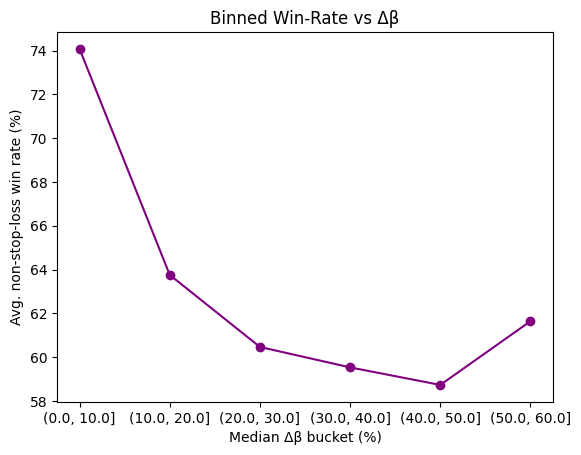

In [108]:
import numpy as np

x = df['Median Absolute Percent Delta Beta (%)']
y = df['Non-stop loss win rate (%)']

# define your buckets, e.g. every 10%
bins = np.arange(0, x.max()+10, 10)
df['β_bin'] = pd.cut(x, bins)

# compute mean win-rate in each bin
grouped = df.groupby('β_bin')[y.name].mean()

# plot
grouped.plot(marker='o', color = 'purple')
plt.xlabel('Median Δβ bucket (%)')
plt.ylabel('Avg. non-stop-loss win rate (%)')
plt.title('Binned Win‐Rate vs Δβ')
plt.show()

Sharp drop at low Δβ
In the first bucket (0–10 % median Δβ), your average non-stop-loss win-rate is about 74 %.

Monotonic decline
As you move to higher Δβ buckets, it steadily falls:

    10–20 % ⇒ ~63.8 %

    20–30 % ⇒ ~60.5 %

    30–40 % ⇒ ~59.5 %

    40–50 % ⇒ ~58.7 %

Small-sample uptick at highest bin

The rise back to ~61.6 % in the 50–60 % bin is almost certainly noise, since you only have a handful of pairs with such extreme Δβ.

Delta-drift really matters. Pairs whose actual hedge ratio drifts (in median) by less than 10 % off their entry β win nearly 75 % of the time.

Once your median Δβ exceeds 20 %, your win-rate falls below 61 %.

Beyond 40 % drift, you’re down below 59 % wins.

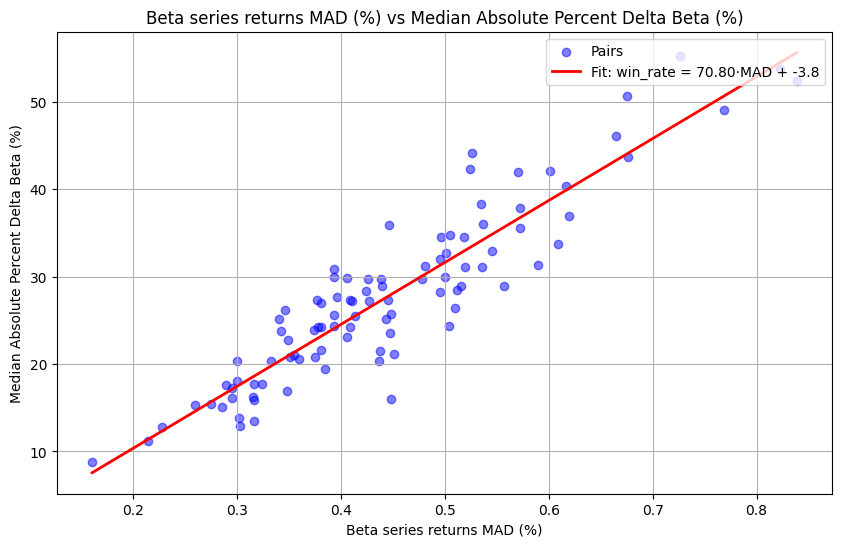

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Pull out your x and y arrays
x = key_metrics_merged_df['Beta series returns MAD (%)'].values
y = key_metrics_merged_df['Median Absolute Percent Delta Beta (%)'].values

# Fit a straight line y = m*x + b
m, b = np.polyfit(x, y, deg=1)

# Prepare a smooth x-range for plotting the line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Pairs')

# Overlay regression line
plt.plot(
    x_line, y_line,
    color='red', lw=2,
    label=f'Fit: win_rate = {m:.2f}·MAD + {b:.1f}'
)


plt.xlabel('Beta series returns MAD (%)')
plt.ylabel('Median Absolute Percent Delta Beta (%)')
plt.title('Beta series returns MAD (%) vs Median Absolute Percent Delta Beta (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
